#Estadística Aplicada con Python
⚠️ Está terminantemente prohibido el uso de herramientas de inteligencia artificial generativa (como ChatGPT, Copilot, Gemini, etc.) para generar código en estos ejercicios.

El objetivo es que desarrolles tu comprensión estadística y habilidades de programación desde los fundamentos. Si se detecta uso indebido de IA, el ejercicio será anulado.

No se pueden usar datasets simulados. Se recomienda buscar datos en sklearn, hugging face, o kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.tsa.seasonal as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Ejercicio 1: Regresión Lineal Simple desde Cero

Escoge un dataset con una sola variable explicativa (X) y una variable dependiente (y).

Implementa una función
```python
    regresion_lineal_simple(X, y, lr=0.01, epochs=1000, verbose=False)
```

que:

Calcule los coeficientes (pendiente y sesgo) usando descenso de gradiente con NumPy.

Si verbose=True, imprima la función de pérdida en cada iteración.

Al final, devuelve los parámetros entrenados (w, b).

Adicional:

+  Representa gráficamente la recta ajustada sobre los datos originales

In [2]:
# Vamos a cargar el dataset de vino de sklearn y mostrar algunos datos
# Importamos load_wine de sklearn.datasets
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
# Mostramos los nombres de las clases del dataset
list(data.target_names)

# Convertimos los datos a un DataFrame de pandas
df = pd.DataFrame(data.data, columns=data.feature_names)

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


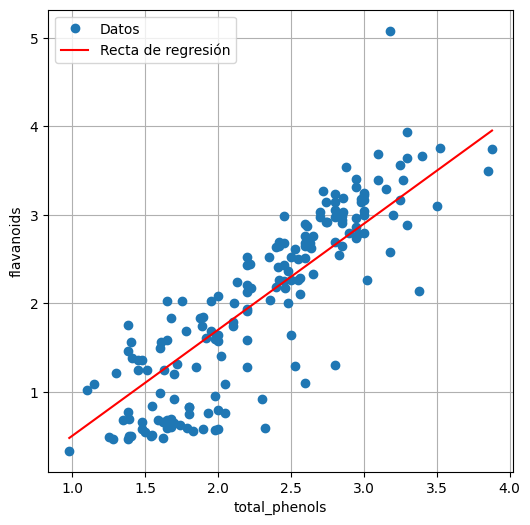

Pendiente (w): 1.1964, Intersección (b): -0.6901


In [3]:
# Calcularemos la regresión lineal simple entre dos variables del dataset de vino
# Para esto, definimos una función que calcula la regresión lineal simple
def regresion_lineal_simple(x, y, lr=0.01, epochs=1000, verbose=False):
    n = len(x)
    w = 0
    b = 0

    for _ in range(epochs):
        # Definición de la predicción
        y_pred = w * x + b
        # Ahora calculamos el error
        error = y_pred - y
        
        # Calculo de la derivada
        dw = (2 / n) * np.sum(error * x)
        db = (2 / n) * np.sum(error)
        
        # Actualizamos de parámetros
        w -= lr * dw
        b -= lr * db

        # Si verbose=True, imprima la función de pérdida en cada iteración
        if verbose:
            perdida = np.mean(error ** 2)
        # Para que la imprima
            print(f"Iteración {_+1}: Pérdida = {perdida}")
    return w, b

# Regresión lineal entre 'total_phenols' y 'flavanoids' (relación fuerte)
x = df["total_phenols"].values
y = df["flavanoids"].values

w, b = regresion_lineal_simple(x, y)

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o', label='Datos')
x_linea = np.linspace(min(x), max(x), 100)
y_linea = w * x_linea + b
plt.plot(x_linea, y_linea, 'r-', label='Recta de regresión')
plt.grid(True)
plt.xlabel("total_phenols")
plt.ylabel("flavanoids")
plt.legend()
plt.show()

print(f"Pendiente (w): {w:.4f}, Intersección (b): {b:.4f}")

# Ejercicio 2: Regresión Lineal Múltiple desde Cero
Escoge un dataset con múltiples variables explicativas.

Implementa una función

```python
    regresion_lineal_simple(X, y, lr=0.01, epochs=1000, verbose=False)
```

que:

Normalice los datos (opcional).

Calcule los coeficientes del modelo de forma vectorizada con NumPy.

Si verbose=True, imprima el valor de la función de pérdida en cada iteración.

Devuelve el vector de coeficientes w y el sesgo b.

Adicional:

* Compara el resultado con el modelo de sklearn.linear_model.LinearRegression para verificar tu implementación.

* Explora el impacto del learning rate en la convergencia del modelo.




In [4]:
# Como la gráfica sólo funcionará si X tiene dos columnas, cargamos lo siguiente del dataset:
# En nuestro dataset la variable "flavanoids" tiene una correlación fuerte con "total_phenols"
# y con "od280/od315_of_diluted_wines", por esa razón escogemos estas columnas

X = df[["total_phenols", "od280/od315_of_diluted_wines"]]
t = df["flavanoids"]

# Definimos una función que calcula la regresión lineal múltiple
    # X va a ser una matriz mxn 
    # t va a ser un vector 1xn
    # w_0 va a ser un escalar
    # w_j va a ser un vector 1xn
    # n va a ser el número de observaciones
    # m va a ser el número de dimensiones

def regresion_lineal_multiple(X, t, epochs=1000, lr=0.01, verbose=False):
    n, m = X.shape
    w = np.zeros(m)
    w_0 = 0

    for _ in range(epochs):
        # Definición de la predicción
        # .dot es el producto entre una matriz y un vector
        t_pred = np.dot(X, w) + w_0

        # Ahora calculamos el error
        error = t_pred - t
        
        # Calculo de la derivada
        dw = (2 / n) * np.dot(X.T, error)
        dw_0 = (2 / n) * np.sum(error)
        
        # Actualizamos de parámetros
        w -= lr * dw
        w_0 -= lr * dw_0

        # Si verbose=True, imprima la función de pérdida en cada iteración
        if verbose:
            perdida = np.mean(error ** 2)
        # Para que la imprima
            print(f"Iteración {_+1}: Pérdida = {perdida}")
    return w, w_0

w, w_0 = regresion_lineal_multiple(X, t, epochs=1000, lr=0.01, verbose=False)

# Definimos la gráfica

def graficar_regresion_3d(X, t, w, b, title="Regresión Lineal Múltiple (3D)"):

    """
        Grafica los datos en 3D junto con el plano ajustado por regresión lineal múltiple.
        Parámetros:
        - X: matriz (n_samples x 2) de variables independientes
        - t: vector (n_samples,) de valores reales
        - w: vector (2,) de pesos aprendidos
        - b: sesgo aprendido
        - title: título del gráfico
    """

    assert X.shape[1] == 2, "La función solo admite datos con exactamente 2 variables independientes."

    # Crear malla para la superficie de predicción
    x_surf, y_surf = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    )

    # Predecir valores z para la superficie
    z_surf = (w[0] * x_surf + w[1] * y_surf + b)

    # Crear gráfico
    fig = go.Figure(data=[
        go.Scatter3d(x=X[:, 0], y=X[:, 1], z=t,
                        mode='markers',
                        marker=dict(size=5, opacity=0.8),
                        name='Datos reales'),
        go.Surface(x=x_surf, y=y_surf, z=z_surf,
                    opacity=0.5,
                    colorscale='Viridis',
                    name='Plano de regresión')
    ])
    fig.update_layout(title=title,
                        scene=dict(
                            xaxis_title='X1',
                            yaxis_title='X2',
                            zaxis_title='Y'),
                        margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

graficar_regresion_3d(X.values, t.values, w, w_0)

# Ejercicio 3: Clasificación Binaria y Evaluación de Modelos

Escoge un dataset con una variable objetivo binaria (0 o 1).

Entrena al menos dos modelos de clasificación distintos, como:

+ Regresión logística

+ k-NN

+ Árboles de decisión

+ SVM, Random Forest, etc.

Evalúa el rendimiento de los modelos usando:

+ Accuracy

+ Precision

+ Recall

+ F1-Score

+ Curva ROC y AUC

Adicional:

+ Construye una tabla comparativa entre modelos.

+ Analiza si alguno de los modelos sobreajusta o subajusta los datos.



In [6]:
df_3 = pd.read_csv(r"Cancer_Data.csv")
df_3.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
# Convertimos la columna de diagnosis en binaria, donde 1 es maligno y 0 es benigno
df_3["diagnosis"] = df_3["diagnosis"].replace({"B": 0, "M": 1})

# Eliminamos la columna Unnamed:32
df_3.drop(columns=["Unnamed: 32"], axis=1, inplace=True)

df_3

In [8]:
# Elegimos nuestro X e y
# Para X, vamos a eliminar la columna que queremos predecir, en este caso diagnosis
X = df_3.drop(columns=["diagnosis"], axis=1)
y = df_3["diagnosis"]

In [9]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
# Hacemos la separación de los datos en entrenamiento y prueba:
# Para esto, usamos train_test_split de sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

In [12]:
# Ahora vamos a estandarizar los datos
# Usaremos StandardScaler de sklearn para estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# A continuación, vamos a entrenar el primer modelo, he elegido el modelo kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)



,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
# Una vez que ya hemos entrenado el primer modelo, vamos a hacerlo con el segundo modelo.
# El segundo modelo que he elegido es el modelo de árbol de decisión
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# Vamos a hacer las predicciones con ambos modelos: 
y_pred_knn = knn.predict(X_test_scaled)
y_pred_arbol = arbol.predict(X_test)

In [16]:
y_pred_knn

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [17]:
y_pred_arbol

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

Evalúa el rendimiento de los modelos usando:
+ Accuracy

+ Precision

+ Recall

+ F1-Score

+ Curva ROC y AUC

In [ ]:
# Ecuaciones:

# Accuracy: Proporción de predicciones correctas sobre el total de predicciones
accuracy = (vp + vn) / (vp + vn + fp + fn)

# Presición: Proporción de verdaderos positivos sobre el total de positivos predichos
precision = vp / (vp + fp) if (vp + fp) > 0 else 0

# Recall: Proporción de verdaderos positivos sobre el total de positivos reales
recall = vp / (vp + fn) if (vp + fn) > 0 else 0

# F1-Score: Media armónica entre precisión y recall
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [19]:
# Ahora vamos a armar la matriz de confusión para ambos modelos
# Esta matriz es una tabla que te dice cómo le fue a tu modelo de clasificación, comparando lo que predijo con la realidad.
# Para esto usaremos confusion_matrix de sklearn

# Para el modelo kNN
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(f"La matriz de confusión para el modelo KNN es:{matriz_confusion_knn}")

print("-------------------------")
# Para el modelo de árbol de decisión
matriz_confusion_arbol = confusion_matrix(y_test, y_pred_arbol)
print(f"La matriz de confusión para el modelo árbol de decisión es:{matriz_confusion_arbol}")

La matriz de confusión para el modelo KNN es:[[68  3]
 [ 3 40]]
-------------------------
La matriz de confusión para el modelo árbol de decisión es:[[67  4]
 [ 3 40]]


In [20]:
# Debemos extraer los valores de la matriz de confusión para calcular las métricas, es decir:

# Modelo KNN
# Verdaderos positivos (VP)
vp_modelo_knn = matriz_confusion_knn[1, 1]  
# Verdaderos negativos (VN)
vn_modelo_knn = matriz_confusion_knn[0, 0]
# Falsos positivos (FP)
fp_modelo_knn = matriz_confusion_knn[0, 1]
# Falsos negativos (FN)
fn_modelo_knn = matriz_confusion_knn[1, 0]

# Hacemos lo mismo para el modelo de árbol de decisión
vp_modelo_arbol = matriz_confusion_arbol[1, 1]
vn_modelo_arbol = matriz_confusion_arbol[0, 0]
fp_modelo_arbol = matriz_confusion_arbol[0, 1]
fn_modelo_arbol = matriz_confusion_arbol[1, 0]

In [21]:
# Calculamos Accuracy, precision, recall y F1-Score

# Primero vamos a evaluarlo para el kNN:
print("MODELO KNN")
accuracy_knn = (vp_modelo_knn + vn_modelo_knn) / (vp_modelo_knn + vn_modelo_knn + fp_modelo_knn + fn_modelo_knn)
print(f" Accuracy para knn: {accuracy_knn}")
print("-------------------------")
precision_knn = vp_modelo_knn / (vp_modelo_knn + fp_modelo_knn) if (vp_modelo_knn + fp_modelo_knn) > 0 else 0
print(f" Precisión para knn: {precision_knn}")
print("-------------------------")
recall_knn = vp_modelo_knn / (vp_modelo_knn + fn_modelo_knn) if (vp_modelo_knn + fn_modelo_knn) > 0 else 0
print(f" Recall para knn: {recall_knn}")
print("-------------------------")
f1_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn) if (precision_knn + recall_knn) > 0 else 0
print(f" F1 score para knn: {f1_score_knn}")

MODELO KNN
 Accuracy para knn: 0.9473684210526315
-------------------------
 Precisión para knn: 0.9302325581395349
-------------------------
 Recall para knn: 0.9302325581395349
-------------------------
 F1 score para knn: 0.9302325581395349


In [22]:
# Segundo vamos a evaluarlo para el modelo de árbol de decisión:
print("MODELO árbol de decisión")
accuracy_arbol = (vp_modelo_arbol + vn_modelo_arbol) / (vp_modelo_arbol + vn_modelo_arbol + fp_modelo_arbol + fn_modelo_arbol)
print(f" Accuracy para arbol: {accuracy_arbol}")
print("-------------------------")
precision_arbol = vp_modelo_arbol / (vp_modelo_arbol + fp_modelo_arbol) if (vp_modelo_arbol + fp_modelo_arbol) > 0 else 0
print(f" Precisión para arbol: {precision_arbol}")
print("-------------------------")
recall_arbol = vp_modelo_arbol / (vp_modelo_arbol + fn_modelo_arbol) if (vp_modelo_arbol + fn_modelo_arbol) > 0 else 0
print(f" Recall para arbol: {recall_arbol}")
print("-------------------------")
f1_score_arbol = 2 * (precision_arbol * recall_arbol) / (precision_arbol + recall_arbol) if (precision_arbol + recall_arbol) > 0 else 0
print(f" F1 score para arbol: {f1_score_arbol}")

MODELO árbol de decisión
 Accuracy para arbol: 0.9385964912280702
-------------------------
 Precisión para arbol: 0.9090909090909091
-------------------------
 Recall para arbol: 0.9302325581395349
-------------------------
 F1 score para arbol: 0.9195402298850575


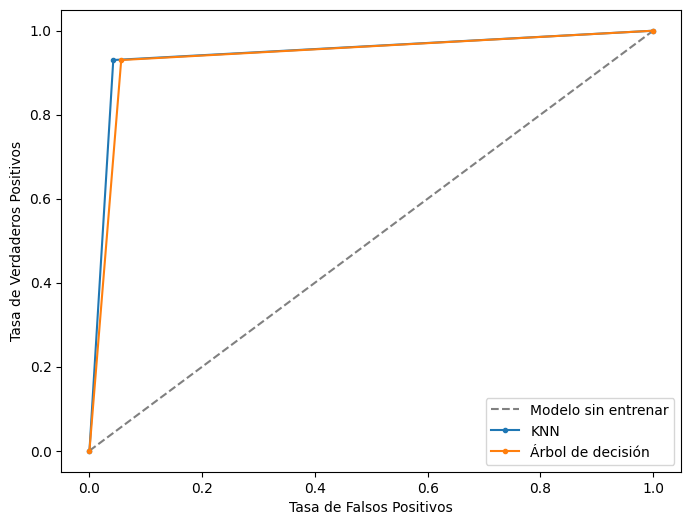

In [23]:
# Y por último nos queda ver curva ROC y AUC para ambos modelos
# La curva ROC permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador.
# El área debajo de la curva (AUC) puede ser utilizado como resumen de la calidad del modelo.

#Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
# Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

# Para la curva ROC usaremos roc_curve de sklearn.metrics
roc_curve_modelo_knn = roc_curve(y_test, y_pred_knn)
roc_curve_modelo_arbol = roc_curve(y_test, y_pred_arbol)

# Y para la AUC usaremos roc_auc_score de sklearn.metrics
area_modelo_knn = roc_auc_score(y_test, y_pred_knn)
area_modelo_arbol = roc_auc_score(y_test, y_pred_arbol)

# Graficaremos la función ROC para ambos modelos
# Modelo sin entrenar
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Modelo sin entrenar', color='gray')

# Modelo KNN
plt.plot(roc_curve_modelo_knn[0], roc_curve_modelo_knn[1], marker='.', label='KNN')
# Modelo Árbol de Decisión
plt.plot(roc_curve_modelo_arbol[0], roc_curve_modelo_arbol[1], marker='.', label='Árbol de decisión')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

# Ejercicio 4: Análisis de Series Temporales

Escoge un dataset con una estructura temporal (ej: evolución de precios, temperatura, ventas...).

Analiza la serie temporal con herramientas estadísticas:

+ Tendencia y estacionalidad

+ Media móvil y suavizados

+ Descomposición de la serie temporal

+ Autocorrelaciones (ACF, PACF)

Responde a las siguientes Cuestiones con tus palabras apoyandote en las graficas que consideres:

+ Describe las características estadísticas de la serie.

+ ¿Es estacionaria?

+ ¿Qué predicción harías para el futuro inmediato?

+ ¿Qué elementos deberías modelar para mejorar una predicción?

Adicional:

+ Usa modelos ARIMA para predecir el comportamiento de la serie temporal. (Opcional, No resta puntos no hacerlo. pero puede subirlos)

In [24]:
# Dataset elegido:
df_pasajeros = pd.read_csv("airline-passengers.csv")
df_pasajeros['month'] = pd.to_datetime(df_pasajeros['month'])
df_pasajeros

# Cada fila nos va a representar un mes del año

,month,total_passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Text(0, 0.5, 'Total Passengers')

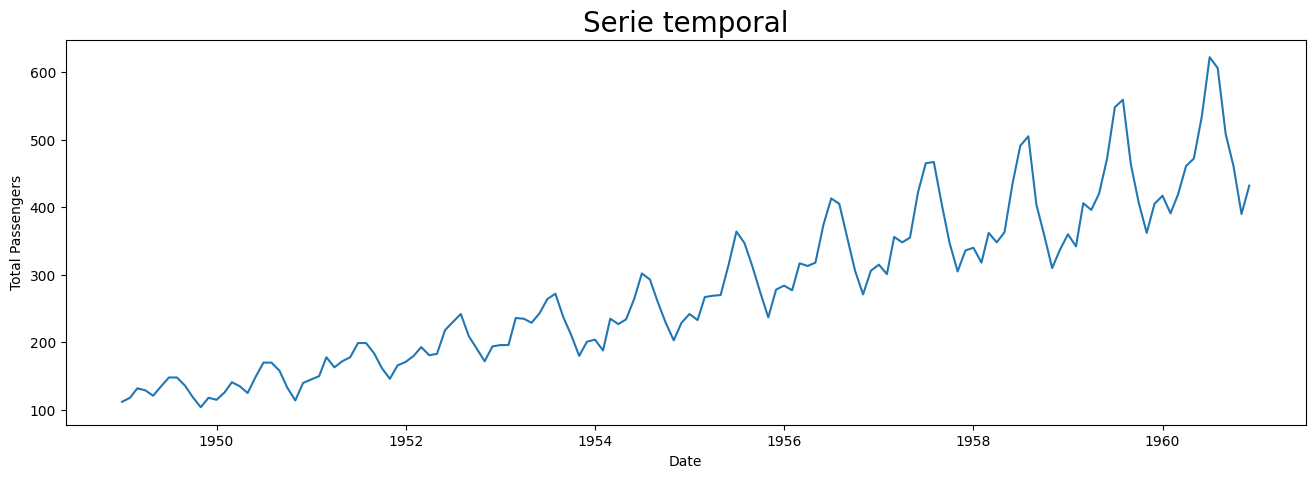

In [25]:
# Graficamos la serie temporal

fig = plt.subplots(figsize=(16, 5))
plt.plot(df_pasajeros['month'], df_pasajeros['total_passengers'])
plt.title('Serie temporal', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Passengers')

In [26]:
# Tendencia y estacionalidad
# Para esto debemos calcular primero la descomposición
descomposicion = smt.seasonal_decompose(df_pasajeros['total_passengers'], model='additive', period=12)
# Ahora podemos calcular la tendencia y la estacionalidad
tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal

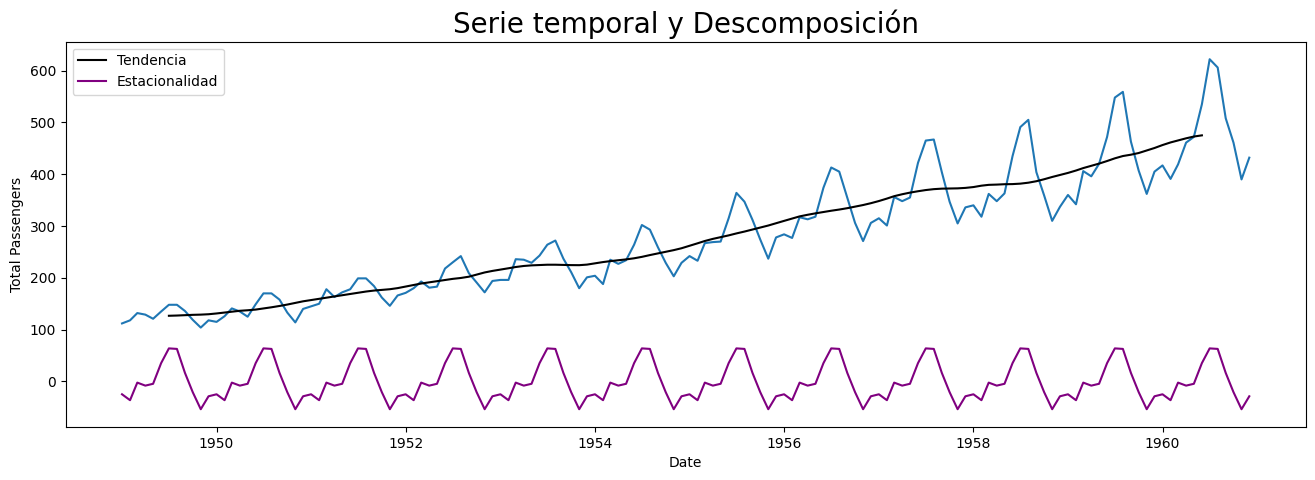

In [27]:
# Graficamos la tendencia y estacionalidad
fig = plt.subplots(figsize=(16, 5))
plt.plot(df_pasajeros['month'], df_pasajeros['total_passengers'])
plt.plot(df_pasajeros['month'], tendencia, label="Tendencia", color="black")
plt.plot(df_pasajeros['month'], estacionalidad, label='Estacionalidad', color='purple')
plt.title('Serie temporal y Descomposición', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.legend()

Text(0, 0.5, 'Total Passengers')

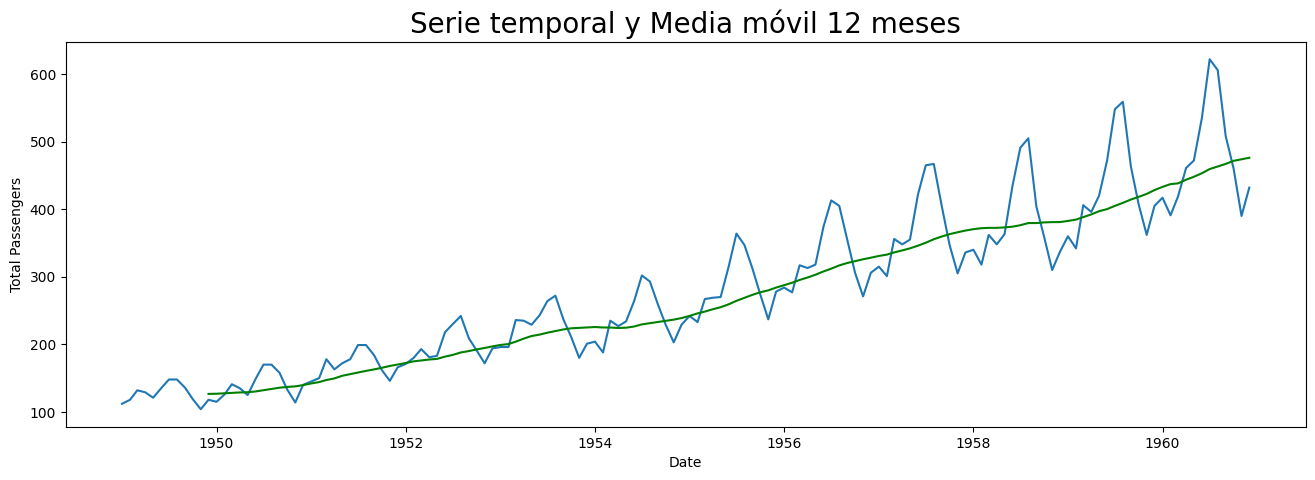

In [28]:
# Calculo de la media móvil a 12 meses sobre la serie temporal
# Para eso utilizaremos numpy

# La media móvil a 12 meses
df_pasajeros["media_movil_12_meses"] = df_pasajeros["total_passengers"].rolling(window=12).mean()

# Vamos a graficar la serie temporal y la media móvil a 12 meses
fig = plt.subplots(figsize=(16, 5))
plt.plot(df_pasajeros['month'], df_pasajeros['total_passengers'])
plt.plot(df_pasajeros['month'], df_pasajeros['media_movil_12_meses'], label='Media móvil 12 meses', color='green')
plt.title('Serie temporal y Media móvil 12 meses', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Passengers')

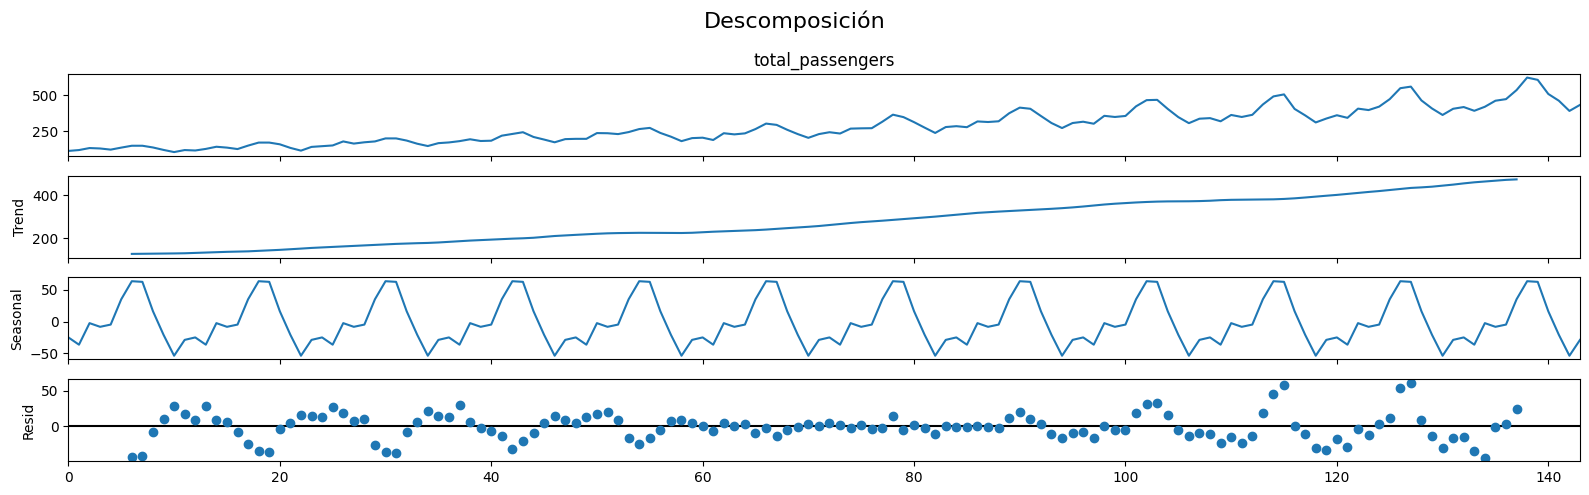

In [29]:
# Descomposición de la serie temporal:

descomposicion = smt.seasonal_decompose(df_pasajeros['total_passengers'], model='additive', period=12)
tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal
residuo = descomposicion.resid

# Graficamos la descomposición 
fig = descomposicion.plot()
fig.set_size_inches(16,5)
plt.suptitle('Descomposición', fontsize=16)
plt.tight_layout()
plt.show()

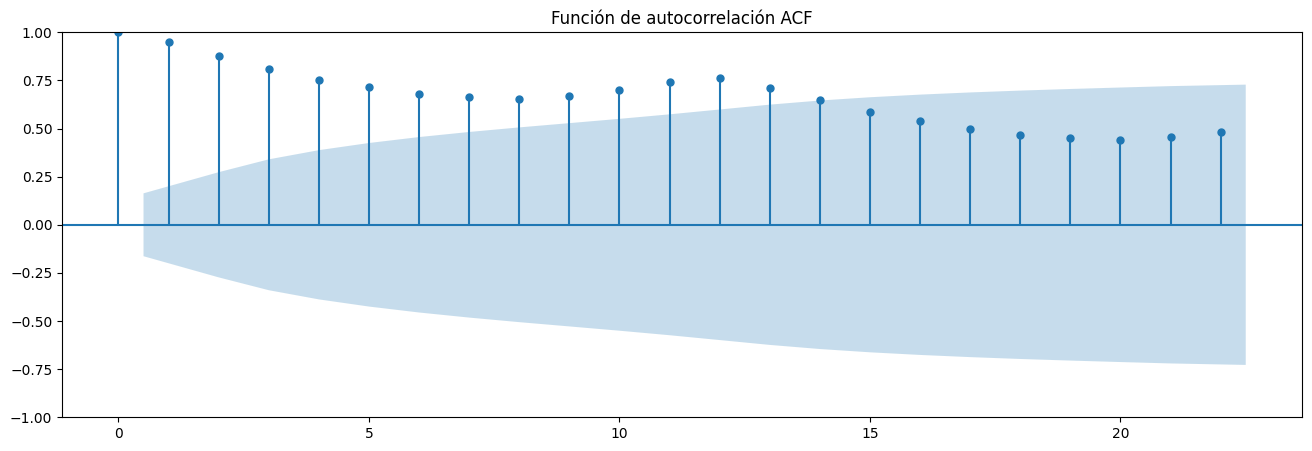

In [30]:
# Autocorrelaciones (ACF, PACF)
# Vamos a graficar ACF (Función de Autocorrelación):
"""La autocorrelación, o correlación serial, analiza los datos de series temporales para buscar 
correlaciones en valores en diferentes puntos de una serie temporal. 
Este método clave de análisis mide cómo un valor se correlaciona consigo mismo.
Si tiene datos mensuales y desea predecir el próximo mes, puede utilizar los valores de los dos meses anteriores como entrada.
Esto significa que está retrocediendo los dos rezagos anteriores en el valor actual. 
(El 'rezago' es simplemente un valor anterior de la variable dependiente.)

 La ACF es un coeficiente de correlación entre dos valores de una serie temporal.
 (https://www.ibm.com/es-es/think/topics/autocorrelation)
 """

"""
plot_acf(df_pasajeros["total_passengers"]): Esta función del módulo plotting del paquete statsmodels traza el gráfico 
de la función de autocorrelación (ACF) para la serie temporal df_pasajeros["total_passengers"].
"""
df_pasajeros.set_index("month", inplace=True)
fig, ax = plt.subplots(figsize=(16, 5))
plot_acf(df_pasajeros["total_passengers"], ax=ax)
plt.title("Función de autocorrelación ACF")
plt.show()

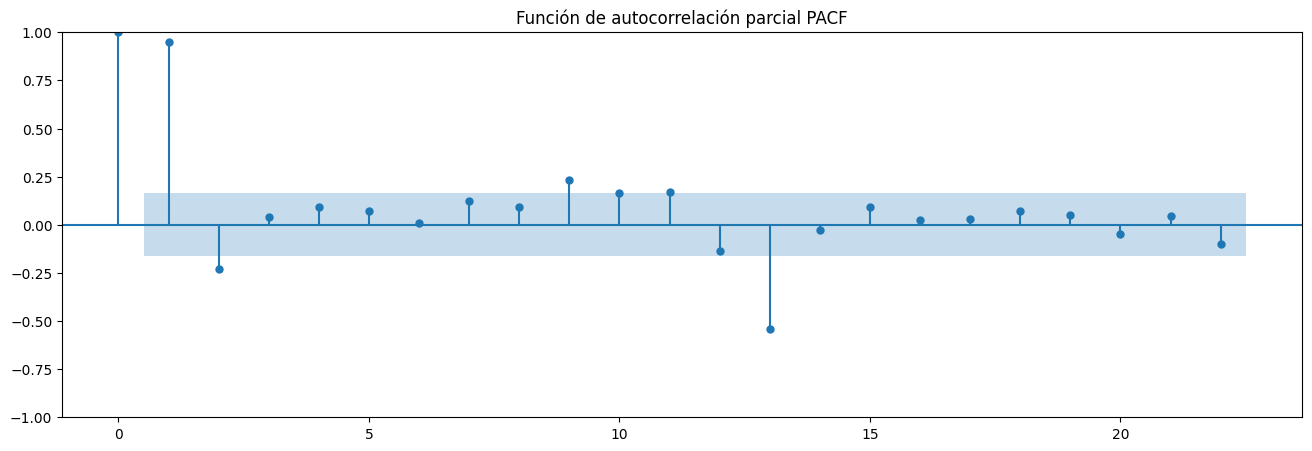

In [31]:
# Vamos a graficar PACF (Función de Autocorrelación Parcial):
"""La función de autocorrelación parcial, a menudo llamada PACF, es similar a la ACF 
excepto que muestra solo la correlación entre dos observaciones que los rezagos más 
cortos entre esas observaciones no explican.
 (https://www.ibm.com/es-es/think/topics/autocorrelation)
 """

"""
plot_pacf(df_pasajeros["total_passengers"]): Esta función del módulo plotting del paquete
statsmodels traza el gráfico de la función de autocorrelación parcial
(PACF) para la serie temporal df_pasajeros["total_passengers"].
"""

fig, ax = plt.subplots(figsize=(16, 5))
plot_pacf(df_pasajeros["total_passengers"], ax=ax)
plt.title("Función de autocorrelación parcial PACF")
plt.show()

# Responde a las siguientes Cuestiones con tus palabras apoyandote en las graficas que consideres:

+ Describe las características estadísticas de la serie.

+ ¿Es estacionaria?

+ ¿Qué predicción harías para el futuro inmediato?

+ ¿Qué elementos deberías modelar para mejorar una predicción?

# 1. Describe las características estadísticas de la serie:

Para esto, vamos a basarnos en la gráfica original y la descomposición de la serie temporal. Es decir,
- Tendencia: Viendo la gráfica, podemos observar que la serie muestra una tendencia creciente, a lo largo del tiempo, la cantidad de pasajeros va aumentando.
- Estacionalidad: Podemos ver que tenemos una estacionalidad regular, cada cierto intervalo, aumenta y disminuye siguiente un patrón similar a lo largo del tiempo. Pensando en el dataset que tenemos, podría decir que como trata de pasajeros viajando a lo largo de los meses del año, este aumento se podrían darse en la temporada alta, y cuando disminuye puede referirse a la temporada baja.
- Por último, Ruido: Al observar la gráfica, podemos notar que tenemos puntos por encima y por debajo de la recta y=0, pero no tenemos una curva clara ni sigue un patrón como en la tendencia y estacionalidad, además no vemos ni subidas ni bajadas muy notables, entonces podemos deducir que el "ruido es deseable", por lo que el modelo captó bien la tendencia y la estacionalidad, lo que quedó fuera (ruido) son variaciones pequeñas sin patrón alguno.

# 2. ¿Es estacionaria?

Para esto observamos la ACF, esto nos muestra que las autocorrelaciones decaen lentamente y esto es una característica de series NO estacionarias. 

Por otro lado, si tenemos en cuenta la tendencia que como dijimos anteriormente es creciente, esto hace referencia a que la media cambia con el tiempo. Y para que una serie sea estacionaria, la media debería mantenerse constante en el tiempo, pero este no es el caso. 

Por lo que concluimos que la serie no es estacionaria. 

# 3. ¿Qué predicción harías para el futuro inmediato?

Si queremos hacer una predicción para un futuro inmediato, oodemos mirar la tendencia y la estacionalidad. 

En un periodo corto, hablando de un mes o pocos meses, se podría esperar que la cantidad de pasajeros siga aunmentando, ya que la tendencia es creciente a lo largo de los años. 

Si nos basamos en la estacionalidad, podríamos observar que siga el mismo ciclo.

# 4. ¿Qué elementos deberías modelar para mejorar una predicción?

Podríamos usar modelos SARIMA o ARIMA para mejorar la prección.